# Support Vector machines

*importing the standard inputs*

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

**<font color = 'red'>considering simple case of classification task for a dataset which is well seperated**

<IPython.core.display.Javascript object>


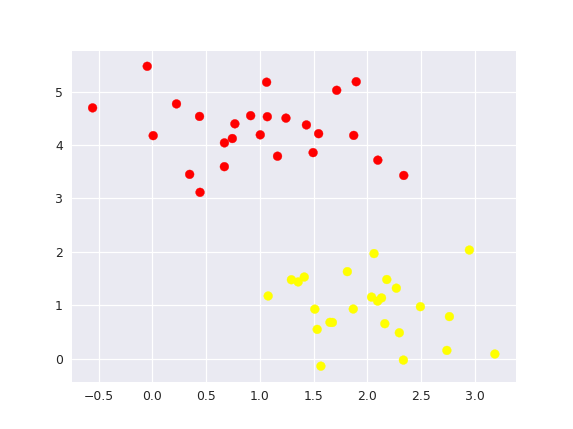

In [2]:
plt.figure()
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:,0], X[:, 1], c=y, s=50, cmap='autumn')

**Drawing the line to seperate the dataset manually.**
*this shows that we can draw many lines but one of them can be the optimal one*

<IPython.core.display.Javascript object>


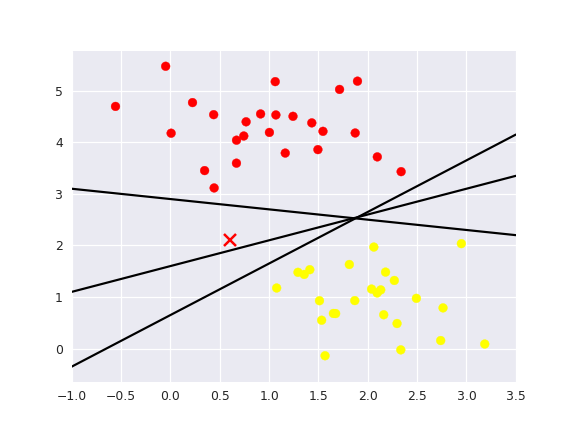

(-1, 3.5)

In [3]:
plt.figure()
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6],[2.1],'x', color='red',markeredgewidth=2,markersize=10)
for m, b in [(1,0.65), (0.5, 1.6), (-0.2,2.9)]:
    plt.plot(xfit, m*xfit + b, '-k')
plt.xlim(-1,3.5)

# SVM to maximise the margin
**Drawing the seperating lines manually**

<IPython.core.display.Javascript object>


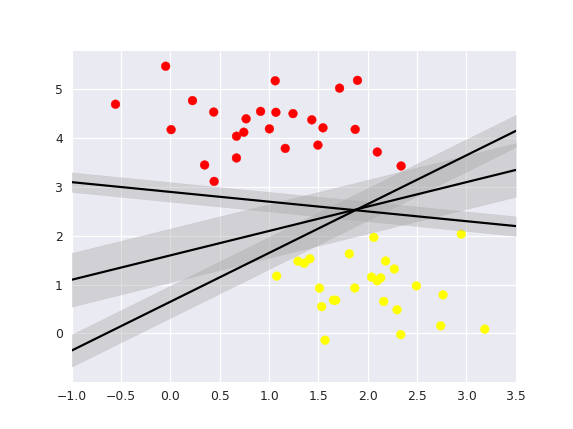

(-1, 3.5)

In [10]:
plt.figure()
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
for m,b,d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m*xfit + b
    plt.plot(xfit, yfit, 'k')
    plt.fill_between(xfit, yfit-d, yfit+d, edgecolor='none', color='#AAAAAA', alpha=0.4)
plt.xlim(-1, 3.5)

**In support vector machines, the line that maximizes this margin is the one we will choose as the optimal model. Support vector machines are an example of such a maximum margin estimator.**

# fitting a SVM on the above dataset

In [11]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

**<font color='red'>Visualising the SVM</font>**

In [14]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

<IPython.core.display.Javascript object>


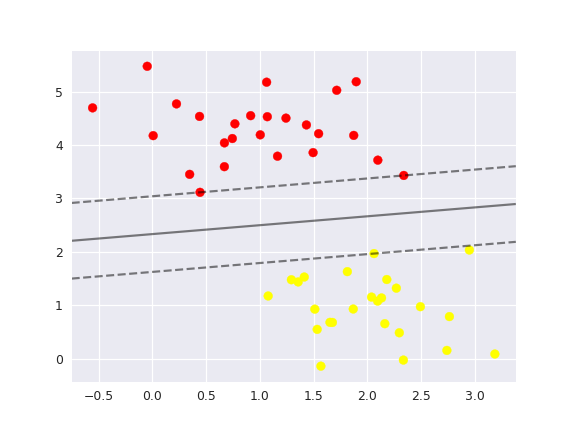

In [17]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

few of the training points just touch the margin. These points are the pivotal elements of this fit, and are known as the support vectors, and give the algorithm its name. 

**In Scikit-Learn, the identity of these points are stored in the support vectors attribute of the classifier**

In [18]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

A key to this classifier's success is that for the fit, only the position of the support vectors matter; any points further from the margin which are on the correct side do not modify the fit! Technically, this is because these points do not contribute to the loss function used to fit the model, so their position and number do not matter so long as they do not cross the margin.

We can see this, for example, if we plot the model learned from the first 60 points and first 120 points of this dataset:

<IPython.core.display.Javascript object>


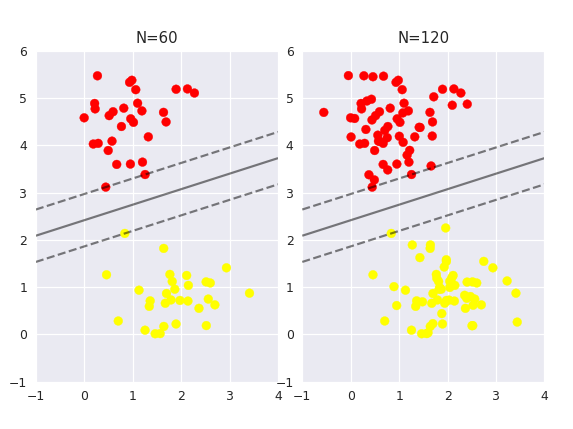

In [29]:
# plt.figure()
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plot_svc_decision_function(model, ax)
    
fig, ax = plt.subplots(1, 2)
fig.subplots_adjust(left=0.0625, right = 0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N={0}'.format(N))   

<IPython.core.display.Javascript object>


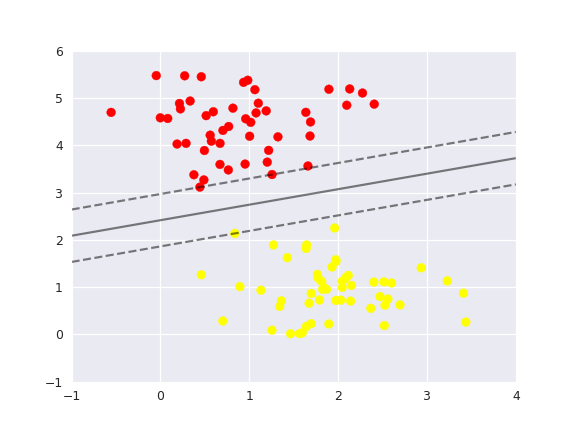

interactive(children=(Dropdown(description='N', options=(100, 200), value=100), Output()), _dom_classes=('widget-interact',))

In [37]:
plt.figure()
from ipywidgets import interact, fixed
interact(plot_svm, N=[100, 200], ax=fixed(None));

# SVM with non-linear boundries (kernels)

<IPython.core.display.Javascript object>


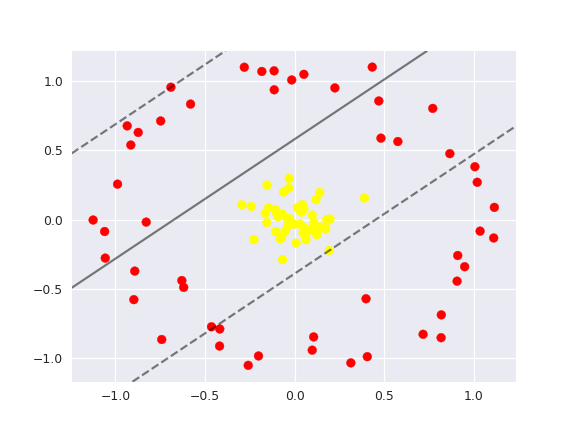

In [44]:
plt.figure()
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor= 0.1, noise=0.1)

clf = SVC(kernel='linear').fit(X, y)  #this linear discriminator should not work well
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

*<font color = 'red'>Bringing the plot in 3D so that a linear classifier can classify the dataset*

In [53]:
r = np.exp(-(X ** 2).sum(1))

<IPython.core.display.Javascript object>


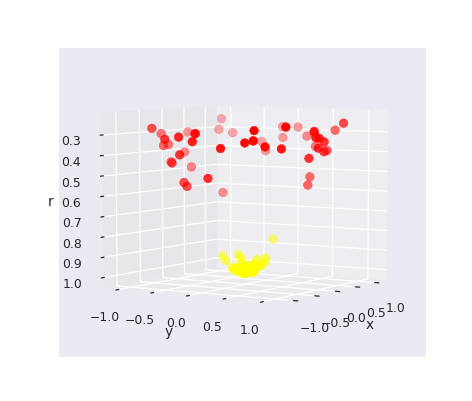

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, description='azim', max=90, min=-30), Output()), _dom_classes=('widget-interact',))

In [54]:
from mpl_toolkits import mplot3d
plt.figure()
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

# <font color = 'red'>using kernal to classify the non-linear data

In [56]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X,y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

<IPython.core.display.Javascript object>


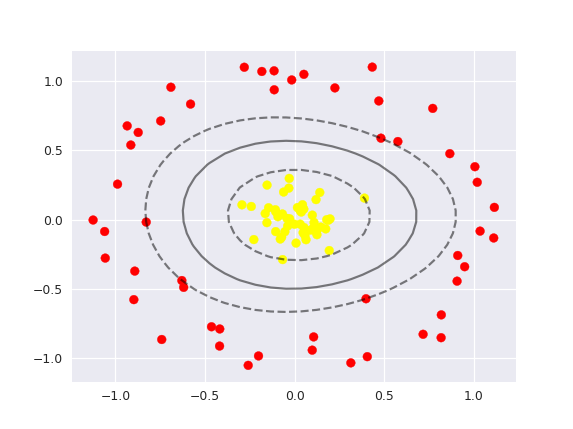

In [57]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none');

# <font color = 'red'>Softmargin in SVM
**for this a mixed data is required where clear boundry can not be drawn between the classes**

<IPython.core.display.Javascript object>


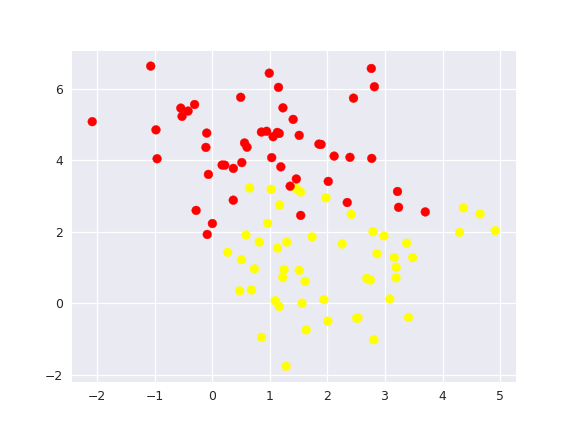

In [58]:
plt.figure()
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');



The hardness of the margin is controlled by a tuning parameter, most often known as $C$. For very large $C$, the margin is hard, and points cannot lie in it. For smaller $C$, the margin is softer, and can grow to encompass some points.

<IPython.core.display.Javascript object>


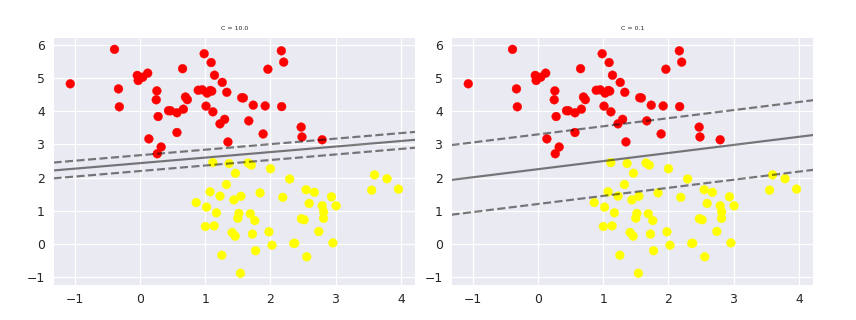

In [62]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
# plt.figure()
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=5)

# Face recognition using SVM

In [65]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


<IPython.core.display.Javascript object>


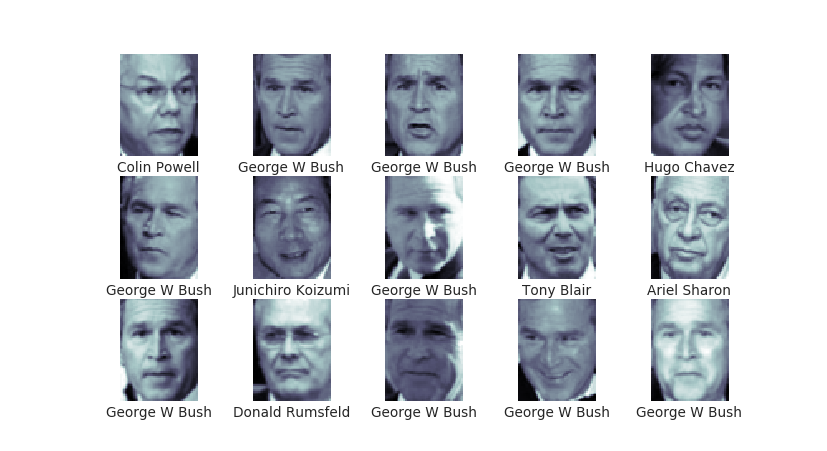

In [66]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])